In [6]:
from pulp import *
import pandas as pd

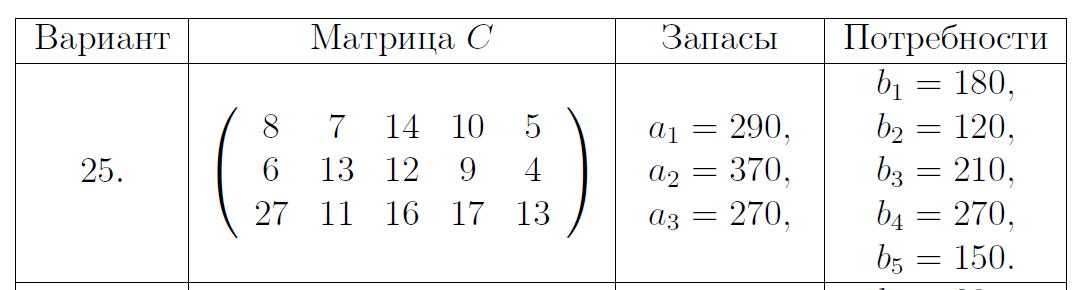

#### Необходимо определить:
- Поставщиков A1, A2, A3 с запасами a1, a2, a3 
- Потребителей B1, B2, B3, B4, B5 с потребностями b1, b2, b3, b4, b5
- Матрицу транспортных расходов

In [7]:
firms = ["A1", "A2", "A3"]
a1, a2, a3 = 290, 370, 270

supply = {"A1": a1, "A2": a2, "A3" : a3} 

consumers = ["B1", "B2", "B3", "B4", "B5"]
b1, b2, b3, b4, b5 = 180, 120, 210, 270, 150

demand = {
    "B1": b1,
    "B2": b2,
    "B3": b3,
    "B4": b4,
    "B5": b5,
}

costs = [
    [8, 7, 14, 10, 5],  
    [6, 13, 12, 9, 4],  
    [27, 11, 16, 17, 13],   
]

costs = makeDict([firms, consumers], costs, 0)

print(supply,"\n")

print(demand)

{'A1': 290, 'A2': 370, 'A3': 270} 

{'B1': 180, 'B2': 120, 'B3': 210, 'B4': 270, 'B5': 150}


#### Проверим, что транспортная задача закрытого типа

In [8]:
sum(supply.values()) == sum(demand.values())

True

Транспортная задача закрытого типа

#### Задача минимизации

In [10]:
model = LpProblem("Distribution_Problem", LpMinimize)
model

Distribution_Problem:
MINIMIZE
None
VARIABLES

#### Все возможные маршруты

In [11]:
Routes = [(w, b) for w in firms for b in consumers]
print(Routes)

[('A1', 'B1'), ('A1', 'B2'), ('A1', 'B3'), ('A1', 'B4'), ('A1', 'B5'), ('A2', 'B1'), ('A2', 'B2'), ('A2', 'B3'), ('A2', 'B4'), ('A2', 'B5'), ('A3', 'B1'), ('A3', 'B2'), ('A3', 'B3'), ('A3', 'B4'), ('A3', 'B5')]


In [12]:
goods = LpVariable.dicts("Numbers_of_goods", (firms, consumers), 0, None, LpInteger)
goods

{'A1': {'B1': Numbers_of_goods_A1_B1,
  'B2': Numbers_of_goods_A1_B2,
  'B3': Numbers_of_goods_A1_B3,
  'B4': Numbers_of_goods_A1_B4,
  'B5': Numbers_of_goods_A1_B5},
 'A2': {'B1': Numbers_of_goods_A2_B1,
  'B2': Numbers_of_goods_A2_B2,
  'B3': Numbers_of_goods_A2_B3,
  'B4': Numbers_of_goods_A2_B4,
  'B5': Numbers_of_goods_A2_B5},
 'A3': {'B1': Numbers_of_goods_A3_B1,
  'B2': Numbers_of_goods_A3_B2,
  'B3': Numbers_of_goods_A3_B3,
  'B4': Numbers_of_goods_A3_B4,
  'B5': Numbers_of_goods_A3_B5}}

#### Целевая функция

In [13]:
model += (
    lpSum([goods[w][b] * costs[w][b] for (w, b) in Routes]),
    "Sum_of_Transporting_Costs"
)
model

Distribution_Problem:
MINIMIZE
8*Numbers_of_goods_A1_B1 + 7*Numbers_of_goods_A1_B2 + 14*Numbers_of_goods_A1_B3 + 10*Numbers_of_goods_A1_B4 + 5*Numbers_of_goods_A1_B5 + 6*Numbers_of_goods_A2_B1 + 13*Numbers_of_goods_A2_B2 + 12*Numbers_of_goods_A2_B3 + 9*Numbers_of_goods_A2_B4 + 4*Numbers_of_goods_A2_B5 + 27*Numbers_of_goods_A3_B1 + 11*Numbers_of_goods_A3_B2 + 16*Numbers_of_goods_A3_B3 + 17*Numbers_of_goods_A3_B4 + 13*Numbers_of_goods_A3_B5 + 0
VARIABLES
0 <= Numbers_of_goods_A1_B1 Integer
0 <= Numbers_of_goods_A1_B2 Integer
0 <= Numbers_of_goods_A1_B3 Integer
0 <= Numbers_of_goods_A1_B4 Integer
0 <= Numbers_of_goods_A1_B5 Integer
0 <= Numbers_of_goods_A2_B1 Integer
0 <= Numbers_of_goods_A2_B2 Integer
0 <= Numbers_of_goods_A2_B3 Integer
0 <= Numbers_of_goods_A2_B4 Integer
0 <= Numbers_of_goods_A2_B5 Integer
0 <= Numbers_of_goods_A3_B1 Integer
0 <= Numbers_of_goods_A3_B2 Integer
0 <= Numbers_of_goods_A3_B3 Integer
0 <= Numbers_of_goods_A3_B4 Integer
0 <= Numbers_of_goods_A3_B5 Integer

#### Ограничения

In [14]:
for w in firms:
    model += (
        lpSum([goods[w][b] for b in consumers]) <= supply[w],
        "Sum_of_Products_out_of_firm_%s" % w
    )
    
for b in consumers:
    model += (
        lpSum([goods[w][b] for w in firms]) == demand[b],
        "Sum_of_Products_into_consumer%s" % b
    )
model   

Distribution_Problem:
MINIMIZE
8*Numbers_of_goods_A1_B1 + 7*Numbers_of_goods_A1_B2 + 14*Numbers_of_goods_A1_B3 + 10*Numbers_of_goods_A1_B4 + 5*Numbers_of_goods_A1_B5 + 6*Numbers_of_goods_A2_B1 + 13*Numbers_of_goods_A2_B2 + 12*Numbers_of_goods_A2_B3 + 9*Numbers_of_goods_A2_B4 + 4*Numbers_of_goods_A2_B5 + 27*Numbers_of_goods_A3_B1 + 11*Numbers_of_goods_A3_B2 + 16*Numbers_of_goods_A3_B3 + 17*Numbers_of_goods_A3_B4 + 13*Numbers_of_goods_A3_B5 + 0
SUBJECT TO
Sum_of_Products_out_of_firm_A1: Numbers_of_goods_A1_B1
 + Numbers_of_goods_A1_B2 + Numbers_of_goods_A1_B3 + Numbers_of_goods_A1_B4
 + Numbers_of_goods_A1_B5 <= 290

Sum_of_Products_out_of_firm_A2: Numbers_of_goods_A2_B1
 + Numbers_of_goods_A2_B2 + Numbers_of_goods_A2_B3 + Numbers_of_goods_A2_B4
 + Numbers_of_goods_A2_B5 <= 370

Sum_of_Products_out_of_firm_A3: Numbers_of_goods_A3_B1
 + Numbers_of_goods_A3_B2 + Numbers_of_goods_A3_B3 + Numbers_of_goods_A3_B4
 + Numbers_of_goods_A3_B5 <= 270

Sum_of_Products_into_consumerB1: Numbers_of_goo

In [15]:
model.solve()

1

In [16]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}\n")

for v in model.variables():
    print(v.name, "=", v.varValue)

print(f"\nОптимальное значение целевой функции = {value(model.objective)}")

Статус решения: 1, Optimal

Numbers_of_goods_A1_B1 = 0.0
Numbers_of_goods_A1_B2 = 60.0
Numbers_of_goods_A1_B3 = 0.0
Numbers_of_goods_A1_B4 = 230.0
Numbers_of_goods_A1_B5 = 0.0
Numbers_of_goods_A2_B1 = 180.0
Numbers_of_goods_A2_B2 = 0.0
Numbers_of_goods_A2_B3 = 0.0
Numbers_of_goods_A2_B4 = 40.0
Numbers_of_goods_A2_B5 = 150.0
Numbers_of_goods_A3_B1 = 0.0
Numbers_of_goods_A3_B2 = 60.0
Numbers_of_goods_A3_B3 = 210.0
Numbers_of_goods_A3_B4 = 0.0
Numbers_of_goods_A3_B5 = 0.0

Оптимальное значение целевой функции = 8780.0


#### Оптимальный план

In [17]:
totals = [v.varValue for v in model.variables()]

series_obj = pd.Series(totals)
  
arr = series_obj.values
  
reshaped_arr = arr.reshape((3, 5))
   
df = pd.DataFrame(reshaped_arr, index=firms, columns=consumers)

df

,B1,B2,B3,B4,B5
A1,0.0,60.0,0.0,230.0,0.0
A2,180.0,0.0,0.0,40.0,150.0
A3,0.0,60.0,210.0,0.0,0.0


#### Оптимальная стоимость перевозки

In [18]:
print(f"Оптимальная стоимость перевозки = {int(value(model.objective))}")

Оптимальная стоимость перевозки = 8780
